In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

Import all the necessary library in the cell below

In [115]:
from time import time

import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix

**Problem 1**

1- Load the titanic dataset from the seaborn package.

In [2]:
titanic_df = sns.load_dataset('titanic')

2- how many columns in this dataset?

In [3]:
print("Number of columns:", titanic_df.columns.size)

Number of columns: 15


3- list the names of all columns and describe the datatype of each column? 

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


4- Count the number of missing values in each column

In [6]:
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

5- Clean the dataset by removing every record that contains a missing value? 

In [7]:
titanic_df.dropna(axis=0, inplace=True)

6 - Compute the average age of females and males who survived? 

In [14]:
print("Average age of females and males who survived is %.2f" % titanic_df.loc[titanic_df['survived'] == 1].age.mean())

Average age of females and males who survived is 32.91


6 - Count how many people survived by age and sex. Display the result as DataFrame. 

In [25]:
data = titanic_df[titanic_df['survived'] == 1].groupby(by=['age', 'sex']).count()['survived']
pd.Series(data, name='Count').to_frame()

Count
age   sex          
0.92  male        1
1.00  male        1
2.00  male        1
3.00  male        1
4.00  female      2
...             ...
58.00 female      3
60.00 female      1
      male        1
63.00 female      1
80.00 male        1

[68 rows x 1 columns]

7- Build a logistic regression model using the pclass, age, parch, sex, and fare columns as explanatory variables and the survived column as response variable

In [52]:
lb = LabelBinarizer()
titanic_df.sex = lb.fit_transform(titanic_df.sex)

X = titanic_df[['pclass', 'age', 'parch', 'sex', 'fare']].values.reshape(-1, 5)
Y = titanic_df['survived'].values.flatten()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

8- Measure its performance using accuracy score and display the confusion matrix. 

Accuracy: 0.8478


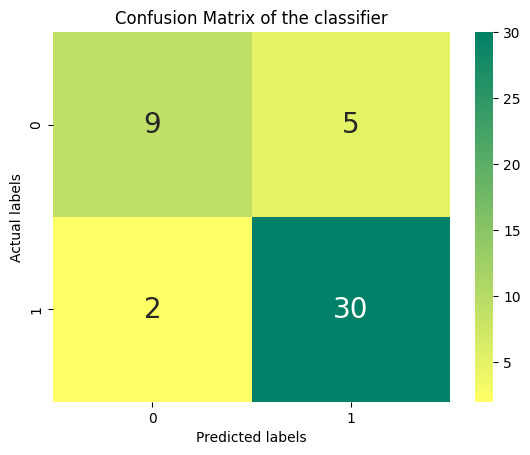

In [53]:
y_pred = classifier.predict(X_test)

print("Accuracy: %.4f"% accuracy_score(Y_test, y_pred))

con_mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(titanic_df['survived']),
           yticklabels=np.unique(titanic_df['survived']))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

9- Interpret the result

In [ ]:
.......

**Problem 2**

Let assume we have the one dimensional process model
\begin{equation}
x_i = \alpha x_{i-1}+\delta_i, \text{ with }\delta_i\thicksim \mathcal{N}(0,q^2),\;\; i = 1,\cdots,N ,
\end{equation}
and $x_0\thicksim \mathcal{N}(\mu,r^2)$. Assume the data model is 

\begin{equation}
y_i = h_i x_{i}+\epsilon_i, \text{ with }\epsilon_i\thicksim \mathcal{N}(0,s^2),\;\; i = 1,\cdots,N ,
\end{equation}
where
$$
h_i =\begin{cases}
 1, \;\;& i=&1,\cdots,N_1\\
0.1, & i=&N_1+1,\cdots, N_2\\
0.9, & i=&N_2+1,\cdots,N
\end{cases}.
$$
Note that $N_1<N_2<N$.

1- Write Python function called **Process** that takes $\alpha, N, q, \mu, r$ and return the array $x$ of the $x_i, i=0,\cdots,N$.

In [92]:
def Process(a,N,q,mu,r):
    x=np.zeros(N+1)
    x[0]=np.random.normal(mu,r)
    for i in range(1,N+1):
        x[i]=a*x[i-1]+np.random.normal(0,q)
    return x

2- Write Python function called **Data** that takes array $x$ of the $x_i$, $s, N_1, N_2, N$ and return the array $y$ of $y_i,i=1,\cdots,N$

In [101]:

def Data(x,r,N,N_1,N_2):
    h = np.ones(N)
    h[N_1:N_2] = 0.1*h[N_1:N_2]
    h[N_2:] = 0.9*h[N_2:]
    y=h*x[1:]+np.random.normal(0,r,len(x)-1)
    return y

3- Write a program to plot the data on the same graph as the process model, for \begin{equation}
r = 0.1, q=0.4, s=0.9, \mu = 0.01, h= 1, \alpha = 0.8,N = 50,  N_1 = 20,  N_2 = 30
\end{equation}

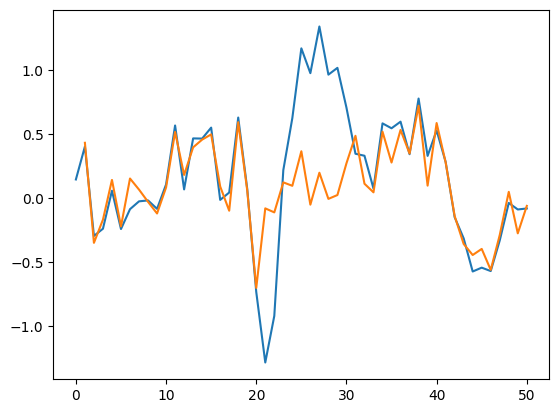

In [102]:
r=0.1
q=0.4
s=0.9
mu=0.01
a=0.8
N=50
N_1=20
N_2=30

np.random.seed(10)
x=Process(a,N,q,mu,r)
y=Data(x,r,N,N_1,N_2)
plt.plot(np.arange(N+1),x)
plt.plot(np.arange(1,N+1),y)
plt.show()

        

4- Use the general formulas given for the Kalman filter to find the one dimensional formulas for

\begin{equation}
\mu_{1\mid 0}, \sigma_{1\mid 0}, k_1, \mu_{1\mid 1},\sigma_{1\mid 1},
\end{equation}
in term of $\alpha, q,r,s,\mu$ and $y_1$ (write the answer as markdown)

\begin{equation}
\begin{cases}
\mu_{1\mid 0}=\mu\alpha \\\\
\sigma_{1\mid 0}=q+\alpha^2r \\\\
k_1=(q+\alpha^2r)h(h^2(q+\alpha^2r)+s)^{-1} \\\\
\mu_{1\mid 1}=\mu\alpha+k_1(y_1-h(\mu\alpha)) \\\\
\sigma_{1\mid 1}=(1-k_1h)(q+\alpha^2r)
\end{cases}
\end{equation}


5- Using the general formulas given for the Kalman filter, write Python program to calculate
\begin{equation}
\mu_{i\mid i-1}, \sigma_{i\mid i-1}, k_i, \mu_{i\mid i},\sigma_{i\mid i},
\end{equation}
for $i=1,\cdots, N$. Be sure to
initialize the loop over $i$. Hint: I suggest using $\text{mu\_old}[i]$ for $\mu_{i\mid i-1}$, $\text{sigma\_old}[i]$ for $\sigma_{i\mid i-1}$, $\text{mu\_new}[i]$ for $\mu_{i\mid i}$, $\text{sigma\_new}[i]$ for $\sigma_{i\mid i}$

In [105]:
np.random.seed(10)
def fs(a,N,q,h,r,s,mu):
    mu_old=np.zeros(N)
    mu_new=np.zeros(N+1)
    k=np.zeros(N)
    sigma_new=np.zeros(N+1)
    sigma_old=np.zeros(N)
    k[0]=(q+a**2*r)*h*(h**2*(q+a**2*r)+s)**(-1)
    sigma_old[0]=q+a**2*r
    sigma_new[0]=(1-k[0]*h)*(q+a**2**r)
    mu_old[0]=mu*a
    mu_new[0]=mu*a+k[0]*(y[0]-h*(mu*a))
    
    for i in range(N):
        mu_old[i]=a*mu_new[i]
        sigma_old[i]=q+a*sigma_new[i]*a
        k[i]=sigma_old[i]*h*(h*sigma_old[i]*h+r)**(-1)
        mu_new[i+1]=mu_old[i]+k[i]*(y[i]-h*mu_old[i])
        sigma_new[i+1]=(1-k[i]*h)*sigma_old[i]
    return mu_new ,sigma_new, mu_old, sigma_old
r=0.1
q=0.4
s=0.9
mu=0.01
a=0.8
N=50
mu_new, sigma_new, mu_old, sigma_old=fs(a,N,q,h,r,s,mu) 

6- Write a Python program to plot the states $x_i$ and data $y_i$ together with the filtered and forecasted estimates on the same graph.

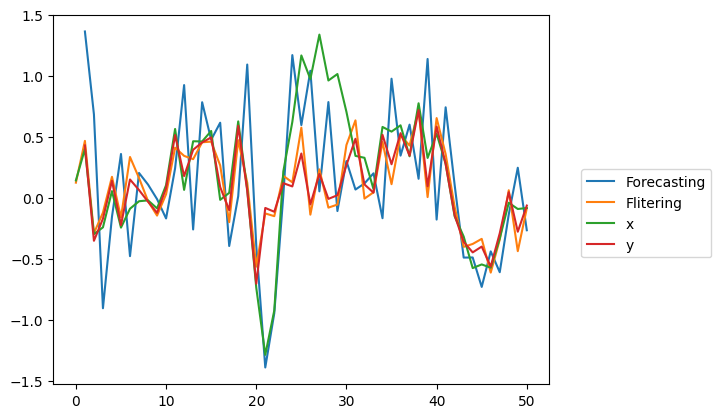

In [107]:
np.random.seed(10)
plt.plot(np.arange(1,N+1),np.random.normal(mu_old,sigma_old),label="Forecasting")
plt.plot(np.arange(N+1),np.random.normal(mu_new,sigma_new),label="Flitering")
# plt.plot(np.arange(1,N+1),sigma_old,label="sigma_old")
# plt.plot(np.arange(N+1),sigma_new,label="sigma_new")
plt.plot(np.arange(N+1),x,label="x")
plt.plot(np.arange(1,N+1),y,label="y")

plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

**Problem 3**

1- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,N, f$ as inputs and return Z. Here, ``N = 50`` is the default value.

In [38]:
def Trap(a, b, f ,N=50):
    x = np.linspace(a, b, N)
    H = x[1] - x[0]
    Z = 0
    for k in range(1, N):
        Z += f(x[k-1]) + f(x[k])
        
    return (H/2)*Z 

2- Let $m_k$  be the midpoint of the subinterval $[x_k,x_{k+1}]$ for all $k=1,\cdots,N-1$, we have 

$$\int_a^bf(x)dx \approx \sum_{m_k} f(m_{k})H = W$$

Write a function named <b>Mid</b> that takes $a,b,N, f$ as inputs and return W. Here, ``N = 50`` is the default value.

In [41]:
def Mid(a, b, f, N=50):
    x = np.linspace(a, b, N)
    H = x[1]-x[0]
    W = 0
    for k in range(N-1):
        m = (x[k] + x[k+1]) / 2
        W += f(m)
        
    return H*W

3- Using **Trap, Mid** and python inbuilt function **odeint**, compute and display the integral 

$$A = \int_0^{\sqrt{\ln(2)}}xe^{x^2}dx$$

In [40]:
a, b = 0, np.sqrt(np.log(2))
f1= lambda x: x*np.exp(x**2)
A=quad(f1, a, b)[0]
print("A =", A)
print("using Trap function  A=", Trap(a, b, f1))
print("using Mid function A=", Mid(a, b, f1))

A = 0.4999999999999998
using Trap function  A= 0.5000907539443507
using Mid function A= 0.4999546250658677


4- After computing the exact value of $A$, write a Python program that searches for the minimun values $N_{Trap}, N_{Mid}$ less than 10000 such that **Trap, Mid**, respectively, give a better approximation of $A$ than **odeint**.  If any the value  $ N_{Trap}, N_{Mid}$ doesn't exist your program should print the string **No $N_{Trap}$ found** or **No $N_{Mid}$ found**, respectively.

In [131]:
start = time()
N = np.arange(51, 9999)
A_quad = quad(f1, a, b)[0]
vTrap = np.vectorize(lambda N: Trap(a, b, f1, N))
vMid = np.vectorize(lambda N: Mid(a, b, f1, N))
A_trap, A_mid = vTrap(N), vMid(N)

A_trap = A_trap[abs(A_trap-A) < abs(A-A_quad)]
A_mid = A_mid[abs(A_mid-A) < abs(A-A_quad)]

N_trap, N_mid = "No N_trap found", "No N_mid found"
if len(A_trap) != 0:
    N_trap = np.where(N_trap == N_trap[0]) + 1

if len(A_mid) != 0:
    N_mid = np.where(N_mid == N_mid[0]) + 1
        
end = time()
print("N_Trap:", N_trap)
print("N_Mid:", N_mid)
print("Elapsed time:", end-start)

N_Trap: No N_trap found
N_Mid: No N_mid found
Elapsed time: 237.10927081108093


In [130]:
len(A_trap)

0

**Problem 4**

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_0<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_0,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_0)& x_2(t_0)&\cdots& x_{M}(t_0)\\
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [55]:
def EulerOdeSys(f, c, t):
    H = t[1] - t[0]
    Z = np.zeros((len(t), len(c)))
    Z[0] = c
    for k in range(len(t) - 1):
        Z[k+1] = Z[k] + H*f(Z[k], t[k])
        
    return Z

2. Write a python function <b> RalstonOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the Ralston method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+\dfrac{2}{3}Hk_1, t_k + \dfrac{2}{3}H),\\\\
z_{k+1} = z_k + H(\dfrac{1}{4}k_1+\dfrac{3}{4}k_2)
\end{cases}
\end{equation}


In [67]:
def RalstonOdeSys(f, c, t):
    H = t[1] - t[0]
    Z = np.zeros((len(t), len(c)))
    Z[0] = c
    for k in range(len(t) - 1):
        k1 = f(Z[k], t[k])
        k2 = f(Z[k]+ H*k1*(2/3), t[k] + H*(2/3))
        Z[k+1] = Z[k] + H*((1/4)*k1 + (3/4)*k2)
        
    return Z

**Problem 5**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + \dfrac{d y}{dx}-6y = 0 \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=0 , y(a) = 1
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g(x) = \dfrac{3}{5}e^{2x}+ \dfrac{2}{5}e^{-3x}$ is the exact solution. Let us denote $e_k = \mid g_k - y_k\mid$

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,N$ (with $N= 100$ as default value) and return array of all $x_k$, $y_k$, $g_k$ and $e_k$.


In [57]:
def myfun(u,x):
        z, y = u
        
        dydx = z
        dzdx = 6*y - z
        
        return np.array([dzdx, dydx])

def SODE(a, b, N=100):
    g= lambda x: (3/5)*np.exp(2*x)+(2/5)*np.exp(-3*x)
    u0 = [0,1]
    x = np.linspace(a, b, N)
    y = odeint(myfun, u0, x)
    e = abs(y[:, 1] - g(x))
    
    return x, y[:,1], g(x), e

2- Using **odeint**, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

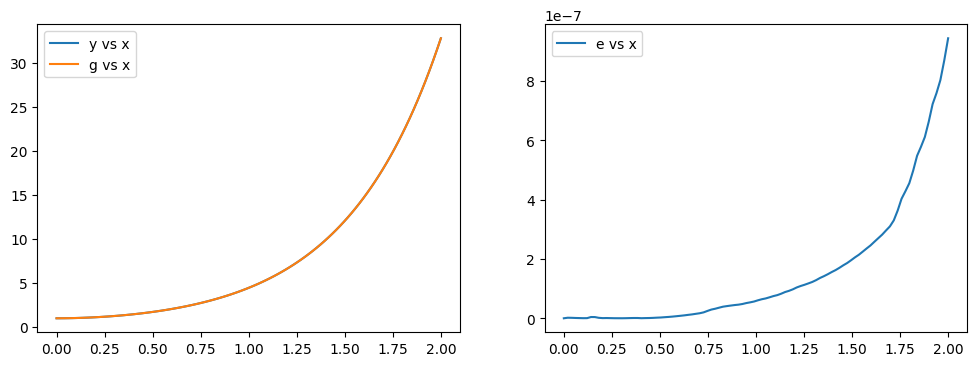

In [63]:
x, y, g, e = SODE(0, 2)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y, label='y vs x')
plt.plot(x, g, label='g vs x')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, e, label='e vs x')
plt.legend()

plt.show()

3- Using <b> RalstonOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

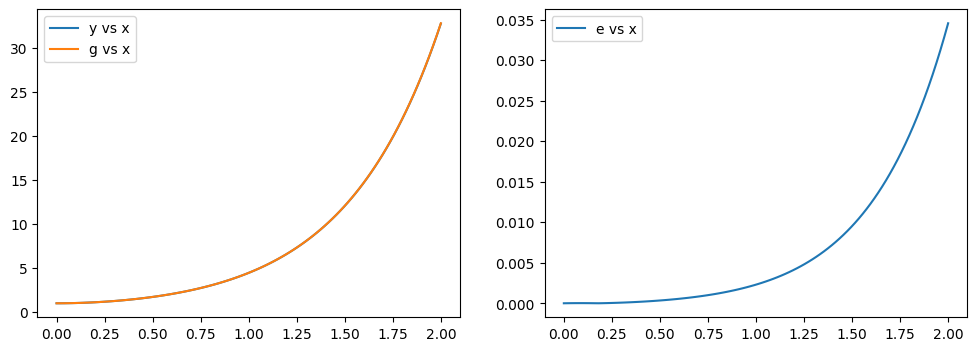

In [65]:
c = np.array([0, 1])
y_Ral = RalstonOdeSys(myfun, c, x)[:, 1]
e_Ral = abs(y_Ral - g)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y_Ral, label='y vs x')
plt.plot(x, g, label='g vs x')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, e_Ral, label='e vs x')
plt.legend()

plt.show()

4- Using <b> EulerOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

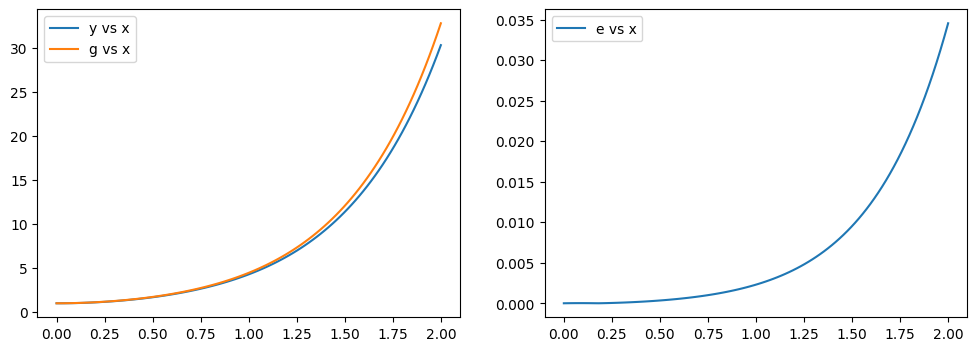

In [66]:
c = np.array([0, 1])
y_Eul = EulerOdeSys(myfun, c, x)[:, 1]
e_Eul = abs(y_Ral - g)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y_Eul, label='y vs x')
plt.plot(x, g, label='g vs x')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, e_Eul, label='e vs x')
plt.legend()

plt.show()

5- The L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$


Write a function called **L2_error** that takes $a,b,H$ and return the L2 error $g_k$ and the approximate solution $y_k$ obtained using **Odeint**, **RalstonOdeSys** and **EulerOdeSys**.

In [77]:
def L2_error(a, b, H):
    N = int((b-a) / H)
    x, y, g, e = SODE(a, b, N)
    y_Eul = EulerOdeSys(myfun, c, x)[:, 1]
    y_Ral = RalstonOdeSys(myfun, c, x)[:, 1]
    
    return (H*e**2).sum(), (H*(y_Ral - g)**2).sum(), (H*(y_Eul - g)**2).sum()

6- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Using **Odeint**, **RalstonOdeSys** and **EulerOdeSys**, compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [78]:
a = 0
b = 2
H = np.array([10**-1, 10**-2, 10**-3, 10**-4])
L2Er = np.zeros((len(H), 3))
for i in range(4):
    L2Er[i] = L2_error(a, b, H[i])

L2Er

array([[1.81002329e-13, 1.60352429e-01, 2.52781953e+01],
       [1.34805300e-13, 1.50397277e-05, 3.25120226e-01],
       [1.30114353e-13, 1.49019776e-09, 3.34555987e-03],
       [1.74505503e-13, 1.48878350e-13, 3.35527372e-05]])

7- For each method **Odeint**, **RalstonOdeSys** and **EulerOdeSys**, plot in the same graph $log(L2Er_j)$ vs $log(H_j)$.

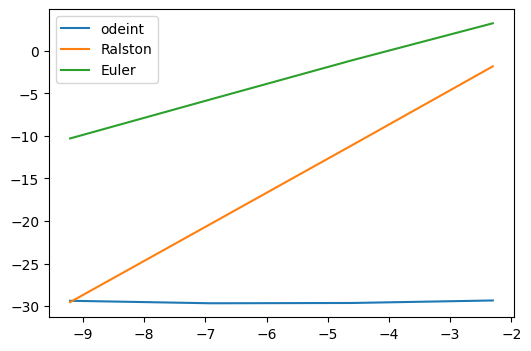

In [91]:
plt.figure(figsize=(6, 4))

plt.plot(np.log(H), np.log(L2Er[:, 0]), label='odeint')
plt.plot(np.log(H), np.log(L2Er[:, 1]), label='Ralston')
plt.plot(np.log(H), np.log(L2Er[:, 2]), label='Euler')
plt.legend()

plt.show()

By assuming that $log(H_j)$ is the explanatory variable of $log(L2Er_j)$, complete the simple linear regression in the case of  **RalstonOdeSys**, **EulerOdeSys** and display the regression coeficient.

Note: Use the whole data to train your linear model.

In [85]:
lin_reg = LinearRegression()
 
X= H.reshape(-1, 1) 
y1= L2Er[:, 1].flatten()
y2= L2Er[:, 2].flatten()

lin_reg.fit(X, y1)
print("Regression Coef (Ral):", lin_reg.coef_[0])

lin_reg.fit(X, y2)
print("Regression Coef (Euler):", lin_reg.coef_[0])

Regression Coef (Ral): 1.6508687453922082
Regression Coef (Euler): 259.41472680136934


**Problem 6**

1-The cost of admission to the world cup 2022 game is
- 320 USD for 3 children, 1 female  and 1 male 
- 600 USD  for 4 females and 2 males 
- 600 USD  for 5 children, 2 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)

let $x$, $y$ and $z$ be the cost of admission children, female and males respectively.
\begin{align*}
3x+y+z=320\\
4y+2z=600\\
5x+2y+2z=600
\end{align*}

2- Write a Python code to compute and display how much is the admission for each child, female and male?

In [42]:
#linear
A = np.array([[3,1,1], [0,4,2], [5,2,2]])
b = np.array([[320], [600], [600]])

z = np.linalg.solve(A,b)
print("Children = %.2f"% z[0][0], "Females = %.2f"% z[1][0], "Males = %.2f"% z[2][0])

Children = 40.00 Females = 100.00 Males = 100.00


3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    e^{x^2} + x = sin(y)\\
    2e^x + y = 3
\end{cases}
\end{equation}


In [45]:
def no_lin(z):
    x, y = z
    
    F = np.empty(2)
    F[0] = np.exp(x**2) + x - np.sin(y)
    F[1] = 2*np.exp(x) + y - 3
    
    return F

zGuess = np.array([1,1])
z = fsolve(no_lin, zGuess)
print("z =", z)

z = [-0.08775219  1.16802431]
